## Do the imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

## Import and view the data

In [ ]:
data = pd.read_excel("twitter.xlsx")

In [ ]:
data.head()

## Subset the columns for analysis

In [295]:
data1 = data[["Column1.text", "Own or Retweet?", "Column1.retweet_count"]]

In [296]:
data1.head()

,Column1.text,Own or Retweet?,Column1.retweet_count
0,"RT @IGN: In this new trailer, Master Chief car...",Retweet,246
1,RT @Woodkid: Thank you @HIDEO_KOJIMA_EN ! http...,Retweet,273
2,RT @DannyBoi_2077: Truck ran out of juice.. so...,Retweet,16
3,RT @DannyBoi_2077: My reaction when the day DS...,Retweet,17
4,"RT @RetroNewsNow: 🎄On November 30, 1977, durin...",Retweet,314


In [297]:
data1["Tweet Length"] = data1["Column1.text"].map(len)

C:\Users\romat\AppData\Local\Temp/ipykernel_20360/1947008203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Tweet Length"] = data1["Column1.text"].map(len)


## Create dummies to easen the analysis and normalize data to logarithmic scale

In [298]:
data1["Retweet"] = pd.get_dummies(data1["Own or Retweet?"])["Retweet "]
data1 = data1.drop(["Own or Retweet?", "Column1.text"], axis = 1)

C:\Users\romat\AppData\Local\Temp/ipykernel_20360/3795821963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Retweet"] = pd.get_dummies(data1["Own or Retweet?"])["Retweet "]


In [299]:
data1["retweet_normalized"] = data1["Column1.retweet_count"].apply(lambda x: np.log(x))
data1["length_normalized"] = data1["Tweet Length"].apply(lambda x: np.log(x))

## Split data into train and test

In [300]:
x = data1[["Column1.retweet_count", "Tweet Length"]]
y = data1["Retweet"]
x_normalized = data1[["retweet_normalized", "length_normalized"]]
#y = a + bX + e

In [301]:
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

In [302]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

## Instantiate and fit the classifier

In [303]:
knn=KNeighborsClassifier()

In [304]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [305]:
## View the score in automatic and manual way
print(knn.score(x_test,y_test))

0.6


In [306]:
pred = knn.predict(x_test)
check = x_test[:]
check["prediction"] = pred
check = check.sort_index()
a = list(check.index.values)
check["real"] = data1.iloc[a, :]["Retweet"]

C:\Users\romat\AppData\Local\Temp/ipykernel_20360/418478617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["prediction"] = pred


## Classify an abstract tweet

In [307]:
knn.predict([[1000, 10]])[0]

C:\Users\romat\miniconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0

## Fit and score the normalized classifier

In [308]:
knn=KNeighborsClassifier()
knn.fit(normalized_x_train,y_train)
print(knn.score(normalized_x_test,y_test))

0.65


## Predict with the normalized classifier

In [309]:
knn.predict([[np.log(1000), np.log(10)]])[0]

C:\Users\romat\miniconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0

## Viewing the data

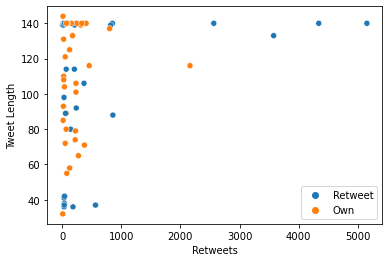

In [310]:
ax = sns.scatterplot(data = pd.DataFrame(np.c_[x_train, y_train]), x = 0, y = 1, hue = 2)
plt.xlabel('Retweets')
plt.ylabel("Tweet Length")
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Retweet', 'Own'], loc='lower right')

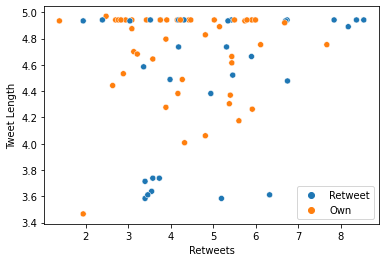

In [311]:
ax = sns.scatterplot(data = pd.DataFrame(np.c_[normalized_x_train, ny_train]), x = 0, y = 1, hue = 2)
plt.xlabel('Retweets')
plt.ylabel("Tweet Length")
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Retweet', 'Own'], loc='lower right')
ax = plt.plot()

## Let's play with the K

In [312]:
knn=KNeighborsClassifier(3)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.55


In [313]:
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.7


In [314]:
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.75


In [315]:
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.7


In [316]:
knn=KNeighborsClassifier(15)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.7


In [317]:
knn=KNeighborsClassifier(19)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.65


# Let's use the best K and change the train/split

In [318]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.05,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print('7 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print('9 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print('11 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))

7 neighbours: 0.6
9 neighbours: 0.6
11 neighbours: 0.6


In [319]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.3,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print('7 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print('9 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print('11 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))

7 neighbours: 0.6666666666666666
9 neighbours: 0.6666666666666666
11 neighbours: 0.6333333333333333


In [320]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.15,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print('7 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print('9 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print('11 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))

7 neighbours: 0.7333333333333333
9 neighbours: 0.8
11 neighbours: 0.8


## K-Fold

In [321]:
from sklearn.model_selection import KFold

In [322]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [323]:
def k_fold_score():
  knn_scores = np.empty(0)
  for train_index, test_index in kf.split(x_normalized):
    print("TRAIN indices:", train_index, "TEST indices:", test_index)
    X_train, X_test = x_normalized.iloc[train_index], x_normalized.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn=KNeighborsClassifier(9)
    knn.fit(X_train, y_train)
    print(str(knn.score(X_test, y_test)))
    knn_scores = np.append(knn_scores, knn.score(X_test, y_test))
  print("K-Fold average score: " + str(np.mean(knn_scores)))

In [324]:
k_fold_score()

TRAIN indices: [ 0  1  3  4  5  6  9 10 11 12 14 15 17 18 19 20 21 23 25 27 28 29 31 32
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 74 76 77 79 80 81 82 83 84 85 87 88
 89 90 91 94 96 97 98 99] TEST indices: [ 2  7  8 13 16 22 24 26 30 33 53 54 55 73 75 78 86 92 93 95]
0.75
TRAIN indices: [ 0  1  2  4  5  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 46 47 49 50 52 53 54 55
 57 58 59 61 64 65 66 67 69 70 72 73 75 77 78 79 81 83 84 85 86 87 88 89
 91 92 93 94 95 96 97 98] TEST indices: [ 3  6 18 27 43 45 48 51 56 60 62 63 68 71 74 76 80 82 90 99]
0.55
TRAIN indices: [ 2  3  6  7  8  9 10 12 13 14 16 18 19 20 21 22 24 25 26 27 29 30 31 32
 33 36 37 39 43 44 45 46 47 48 49 51 53 54 55 56 57 58 60 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 92 93 94 95 96 97 98 99] TEST indices: [ 0  1  4  5 11 15 17 23 28 34 35 38 40 41 4

In [325]:
kf = KFold(n_splits=4, shuffle=True, random_state=0)
k_fold_score()

TRAIN indices: [ 0  1  4  5  6  9 10 11 12 14 15 17 18 19 20 21 23 25 27 28 29 31 32 34
 35 36 37 38 39 40 41 42 44 46 47 48 49 50 51 52 56 57 58 59 60 61 63 64
 65 66 67 68 69 70 72 74 76 77 79 80 81 82 83 84 85 87 88 89 90 91 94 96
 97 98 99] TEST indices: [ 2  3  7  8 13 16 22 24 26 30 33 43 45 53 54 55 62 71 73 75 78 86 92 93
 95]
0.72
TRAIN indices: [ 0  2  3  7  8  9 10 11 12 13 14 16 19 20 21 22 23 24 25 26 28 29 30 31
 32 33 34 35 36 37 39 43 44 45 46 47 49 50 52 53 54 55 57 58 59 62 64 65
 66 67 69 70 71 72 73 75 77 78 79 81 83 84 85 86 87 88 89 91 92 93 94 95
 96 97 98] TEST indices: [ 1  4  5  6 15 17 18 27 38 40 41 42 48 51 56 60 61 63 68 74 76 80 82 90
 99]
0.6
TRAIN indices: [ 1  2  3  4  5  6  7  8  9 12 13 15 16 17 18 20 21 22 24 25 26 27 30 33
 36 37 38 39 40 41 42 43 44 45 46 47 48 51 53 54 55 56 58 60 61 62 63 64
 65 67 68 69 70 71 72 73 74 75 76 77 78 80 81 82 83 86 87 88 90 92 93 94
 95 96 99] TEST indices: [ 0 10 11 14 19 23 28 29 31 32 34 35 49 50 52 57 59 66 79 